# Домашнее задание 18

Производственный процесс моделирования

In [16]:
import pandas as pd
import statsmodels.api as sm

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


corp_col = '#40ba21'

### Загружаем данные (датасет Fertility)

"Fertility2 is a random subset of Fertility with 30,000 observations." (https://search.r-project.org/CRAN/refmans/AER/html/Fertility.html)

In [17]:
item = 'Fertility2' # Выбрать из поля Item для вашего датасета
package = 'AER' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head(15)

,morekids,gender1,gender2,age,afam,hispanic,other,work
0,no,female,female,35,no,no,no,40
1,no,female,male,33,no,no,no,52
2,no,female,female,28,no,no,no,12
3,no,male,male,28,no,no,no,0
4,no,female,male,31,no,no,no,0
5,no,female,male,33,no,no,no,0
6,yes,female,female,28,no,no,no,0
7,no,female,female,25,no,no,no,20
8,yes,female,female,31,no,no,no,0
9,no,male,female,35,no,no,no,37


In [18]:
df.columns

Index(['morekids', 'gender1', 'gender2', 'age', 'afam', 'hispanic', 'other',
       'work'],
      dtype='object')

В массиве представлены только женщины с двумя или более детьми, по ним есть данные о количестве рабочих недель, расе, возрасте и поле первых двух детей.

## Разведочный анализ данных

C:\Users\stepa\AppData\Local\Temp\ipykernel_37812\2180879389.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ethnicity', data=df, order=ethnicity_order, palette='viridis')


Text(0, 0.5, 'Количество женщин')

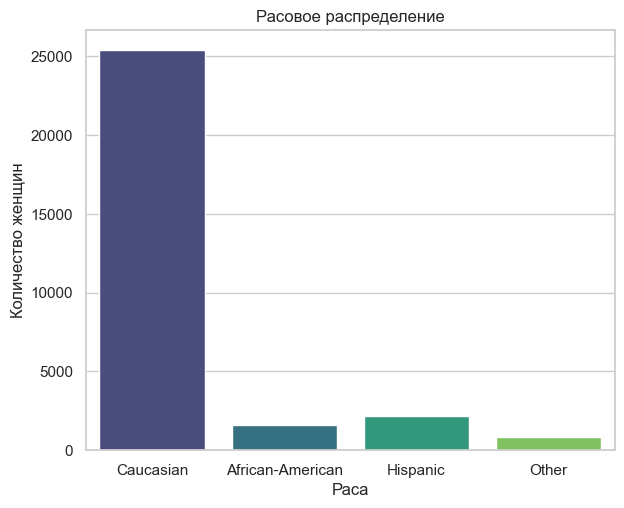

In [19]:
# Создадим колонку расы
df['ethnicity'] = np.select(
    [
        df['afam'] == 'yes',
        df['hispanic'] == 'yes',
        df['other'] == 'yes'
    ],
    ['African-American', 'Hispanic', 'Other'],
    default='Caucasian'
)

sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
ethnicity_order = ['Caucasian', 'African-American', 'Hispanic', 'Other']
sns.countplot(x='ethnicity', data=df, order=ethnicity_order, palette='viridis')
plt.title('Расовое распределение')
plt.xlabel('Раса')
plt.ylabel('Количество женщин')

В массиве преобладают белые женщины.

C:\Users\stepa\AppData\Local\Temp\ipykernel_37812\2989564876.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = (df.groupby([age_bins, 'ethnicity'])


<Figure size 1200x800 with 0 Axes>

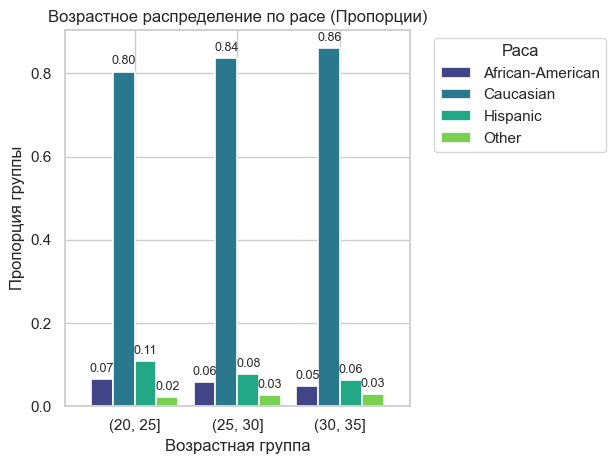

In [20]:
plt.figure(figsize=(12, 8))

# Создадим возрастные страты
age_bins = pd.cut(df['age'], bins=range(20, 40, 5))
age_groups = age_bins.unique().sort_values()

# Пропорции страт
prop_data = (df.groupby([age_bins, 'ethnicity'])
             .size()
             .unstack()
             .apply(lambda x: x/x.sum(), axis=1))

# График
ax = prop_data.plot(kind='bar', width=0.85, color=sns.color_palette('viridis', 4),
                    edgecolor='white', linewidth=1.2)

plt.title('Возрастное распределение по расе (Пропорции)')
plt.xlabel('Возрастная группа')
plt.ylabel('Пропорция группы')
plt.xticks(rotation=0)

# Легенда
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Раса', 
          bbox_to_anchor=(1.05, 1), loc='upper left')

# Значения над столбиками
for i, rect in enumerate(ax.patches):
    if rect.get_height() > 0.01:  # Only label significant bars
        ax.text(rect.get_x() + rect.get_width()/2, 
                rect.get_height() + 0.01, 
                f'{rect.get_height():.2f}', 
                ha='center', va='bottom', 
                fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

Белые женщины позже рожают детей по сравнению с латиносами и афро-американками.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'African-American'),
  Text(1, 0, 'Caucasian'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Other')])

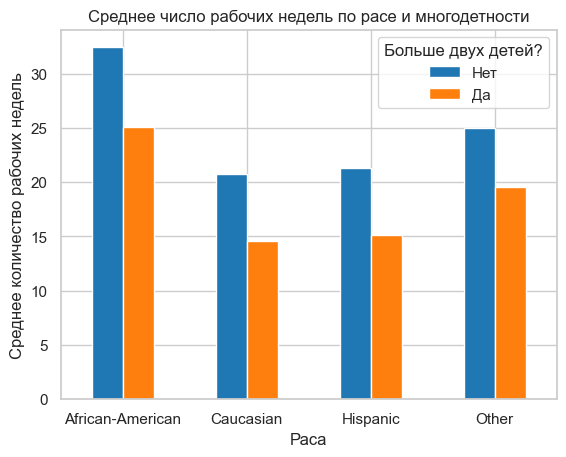

In [21]:
work_by_ethnicity = df.groupby(['ethnicity', 'morekids'])['work'].mean().unstack()
work_by_ethnicity.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])

plt.title('Среднее число рабочих недель по расе и многодетности')
plt.xlabel('Раса')
plt.ylabel('Среднее количество рабочих недель')
plt.legend(title='Больше двух детей?', labels=['Нет', 'Да'])
plt.xticks(rotation=0)

Афро-американки и представительницы других рас с детьми в среднем работают значительно больше чем белые и латино-американки женщины с детьми.

C:\Users\stepa\AppData\Local\Temp\ipykernel_37812\2150571919.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  age_dist = sns.countplot(x='age_group', data=df, palette='viridis', order=age_labels)


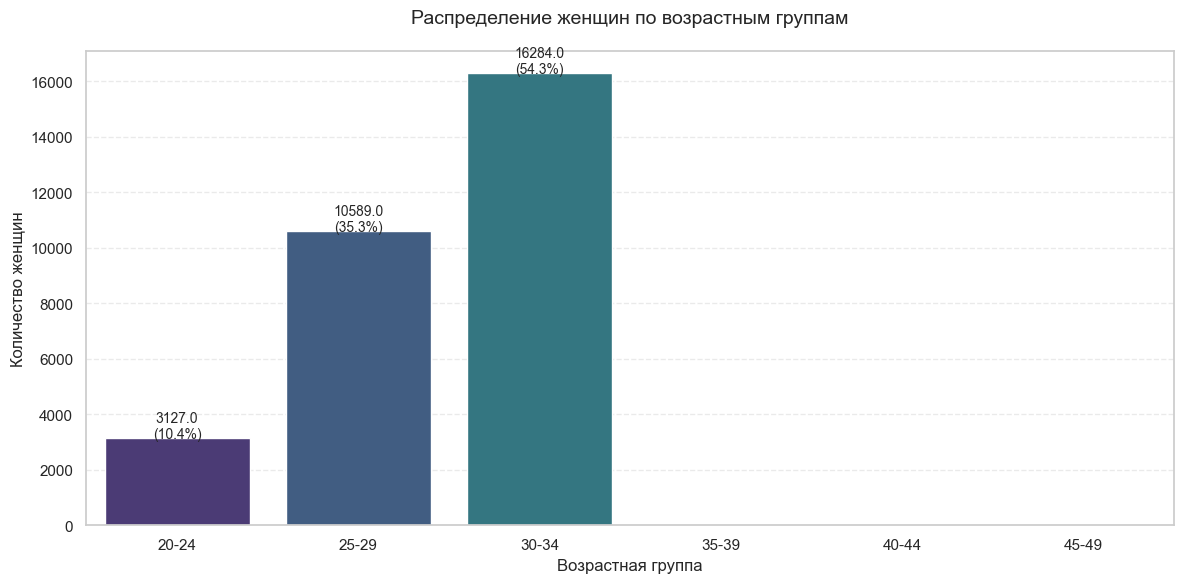

In [22]:
# Список упорядоченных возрастных групп
age_labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49']

# Создадим отдельную переменную с возрастными группами
df['age_group'] = pd.cut(df['age'], 
                         bins=[20, 25, 30, 35, 40, 45, 50],
                         labels=['20-24', '25-29', '30-34', '35-39', '40-44', '45-49'])


# Строим распределение
plt.figure(figsize=(12, 6))
age_dist = sns.countplot(x='age_group', data=df, palette='viridis', order=age_labels)

# Добавляем аннотации
for p in age_dist.patches:
    height = p.get_height()
    age_dist.text(p.get_x() + p.get_width()/2., height + 10,
            f'{height}\n({height/len(df)*100:.1f}%)',
            ha="center", fontsize=10)

plt.title('Распределение женщин по возрастным группам', fontsize=14, pad=20)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Количество женщин', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Представлен только возрастной диапазон от 20 до 34 лет. Более половины женщин старше 30.

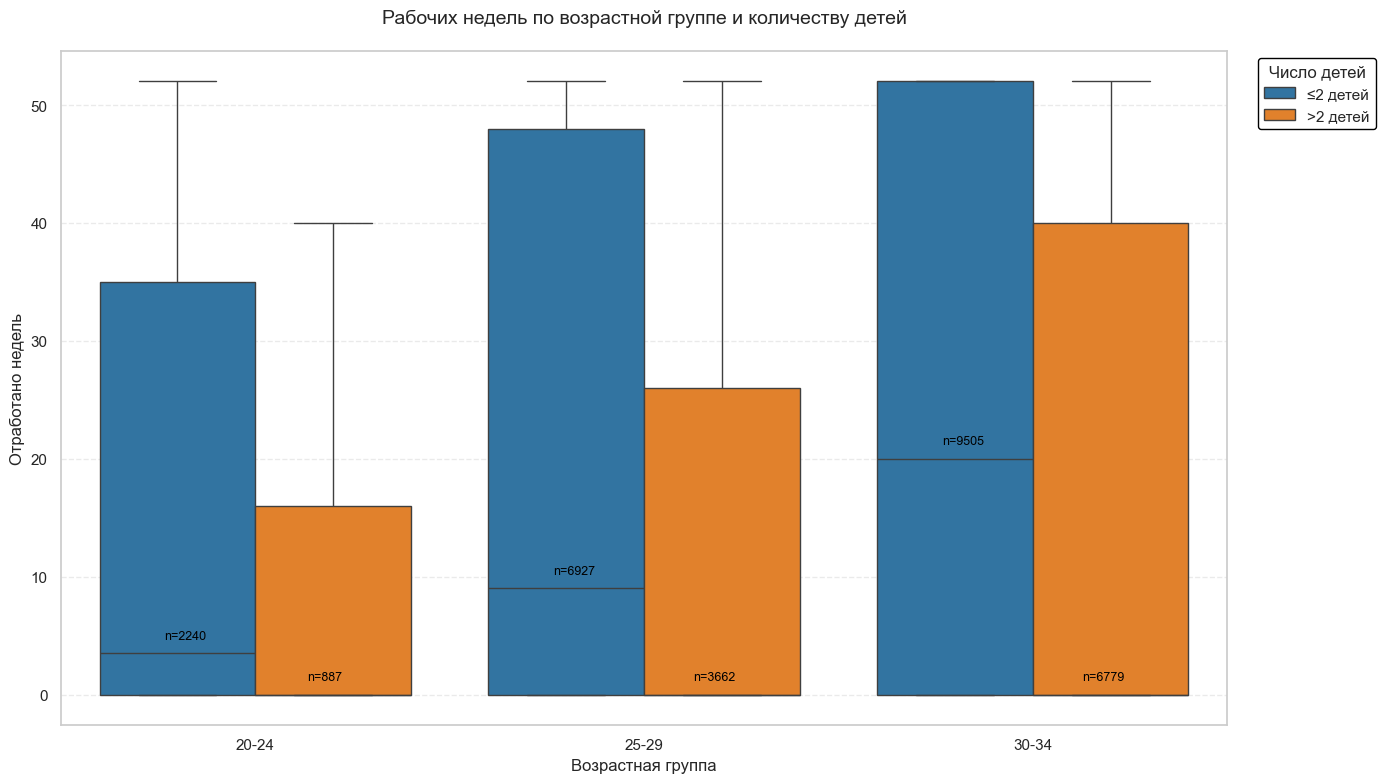

In [23]:
plt.figure(figsize=(14, 8))

# График
ax = sns.boxplot(x='age_group', y='work', hue='morekids', data=df,
                 palette=['#1f77b4', '#ff7f0e'],  # Blue and orange
                 hue_order=['no', 'yes'],
                 order=['20-24', '25-29', '30-34'], #, '35-39', '40-44', '45-49'],
                 dodge=True,  # This ensures side-by-side positioning
                 width=0.8,   # Adjust width for better spacing
                 showfliers=False)

# Customize the plot
plt.title('Рабочих недель по возрастной группе и количеству детей', fontsize=14, pad=20)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Отработано недель', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Легенда
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['≤2 детей', '>2 детей'], 
          title='Число детей',
          fontsize=11,
          title_fontsize=12,
          frameon=True,
          framealpha=1,
          edgecolor='black',
          bbox_to_anchor=(1.02, 1),
          loc='upper left')

# Аннотации
for i, age_group in enumerate(['20-24', '25-29', '30-34']): #, '35-39', '40-44', '45-49']):
    for j, kid_status in enumerate(['no', 'yes']):
        subset = df[(df['age_group'] == age_group) & (df['morekids'] == kid_status)]
        n = len(subset)
        if n > 0:
            # Position text slightly above the median
            median_work = subset['work'].median()
            x_pos = i + (-0.18 if j == 0 else 0.18)  # Adjust x-position based on child status
            ax.text(x_pos, median_work + 1, f'n={n}',
                    ha='center', va='bottom', fontsize=9, color='black')

# Add grid lines for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

Большинство женщин с двумя детьми работает на полную ставку после 30-ти (когда дети уже достаточно взрослые). Женщины с более чем с друмя детьми чаще работают неполную ставку или не работают даже после 30-ти.

C:\Users\stepa\AppData\Local\Temp\ipykernel_37812\3264271759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='work_group', data=df, palette='viridis', order=labels)


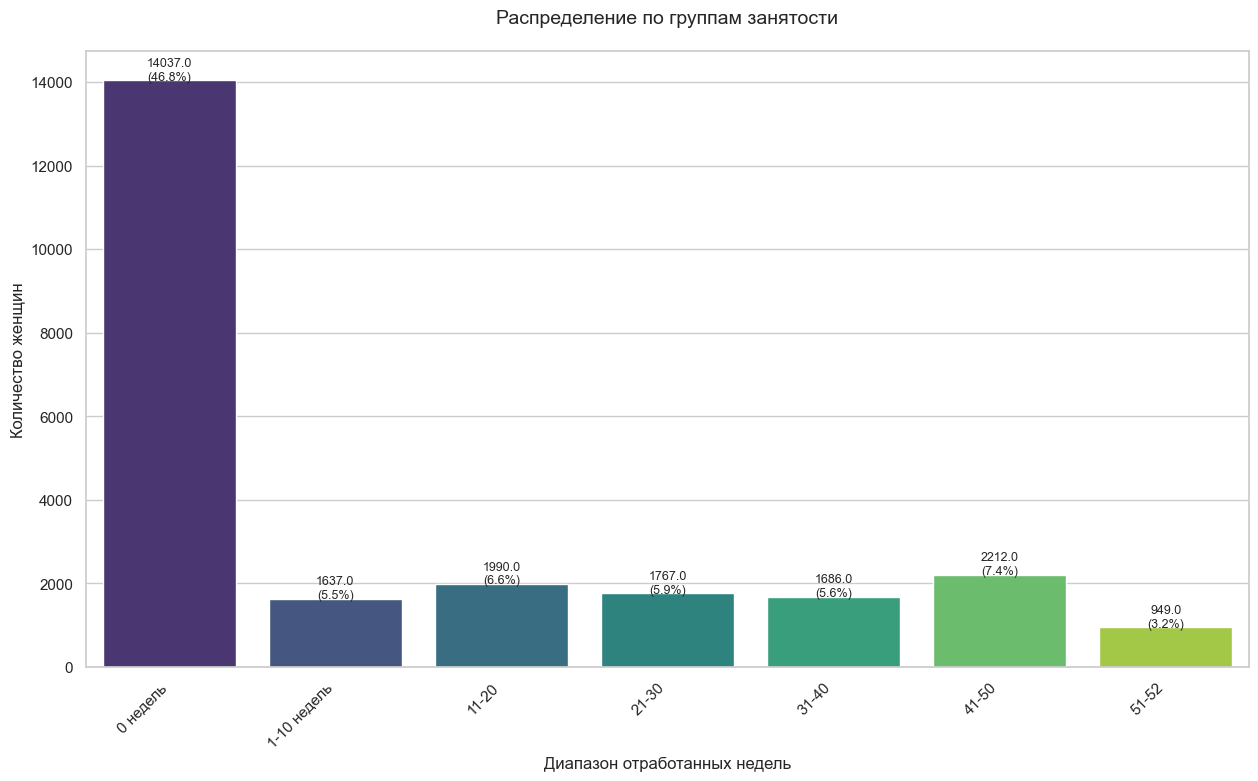

In [24]:
plt.figure(figsize=(15, 8))

# Создаем категории для группировки
bins = [0, 1, 10, 20, 30, 40, 50, 52]  # Границы групп
labels = ['0 недель', '1-10 недель', '11-20', '21-30', '31-40', '41-50', '51-52']
df['work_group'] = pd.cut(df['work'], bins=bins, labels=labels, right=False)

# Основная гистограмма с группировкой
ax = sns.countplot(x='work_group', data=df, palette='viridis', order=labels)
plt.title('Распределение по группам занятости', pad=20, fontsize=14)
plt.xlabel('Диапазон отработанных недель', fontsize=12)
plt.ylabel('Количество женщин', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем процентные аннотации
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f'{height}\n({height/total*100:.1f}%)',
            ha="center", fontsize=9)


Основные выводы из набора данных.

Статус работы: 
* Около 54% женщин работают, количество рабочих недель остальных женщин выглядит довольно случайным.

Отношения:
* Положительная корреляция между возрастом и количеством детей, что естественно
* Работающие женщины, как правило, имеют меньше детей в одинаковом возрасте.


Демографическое распределение:

* Большинство матерей - европеоиды (≈80%)
* Афроамериканки и испаноязычные матери составляют по 7-8% от общей выборки

Возрастные характеристики:

* В массиве представлены женщины не старше 34 лет и не младше 20-ти. Больше половины массива это женщины старше 30-ти лет.
* Европеиойдные женщины, как правило, немного старше, чем другие группы женщин

Структура занятости:

* Матери, у которых более 2-х детей, работают значительно больше, чем те, у кого 2-е детей. С возрастом уровень занятости возрастает
* В среднем афроамериканские матери работают больше всего недель

Основные корреляции:

* Умеренная отрицательная корреляция между возрастом и рабочими неделями
* Сильная отрицательная корреляция между наличием более 2 детей и трудовой активностью
* Этническая принадлежность демонстрирует четкие закономерности в трудовой активности

### Пропуски, выбросы, анамалии

#### Пропуски

In [25]:
print("Пропуски в данных:")
print(df.isnull().sum())

Пропуски в данных:
morekids         0
gender1          0
gender2          0
age              0
afam             0
hispanic         0
other            0
work             0
ethnicity        0
age_group        0
work_group    5722
dtype: int64


Пропуски отствуют.

In [26]:
# Проверка категориальных значений
valid_genders = ['male', 'female']
df = df[df['gender1'].isin(valid_genders) & df['gender2'].isin(valid_genders)]

#### Выбросы и аномалии

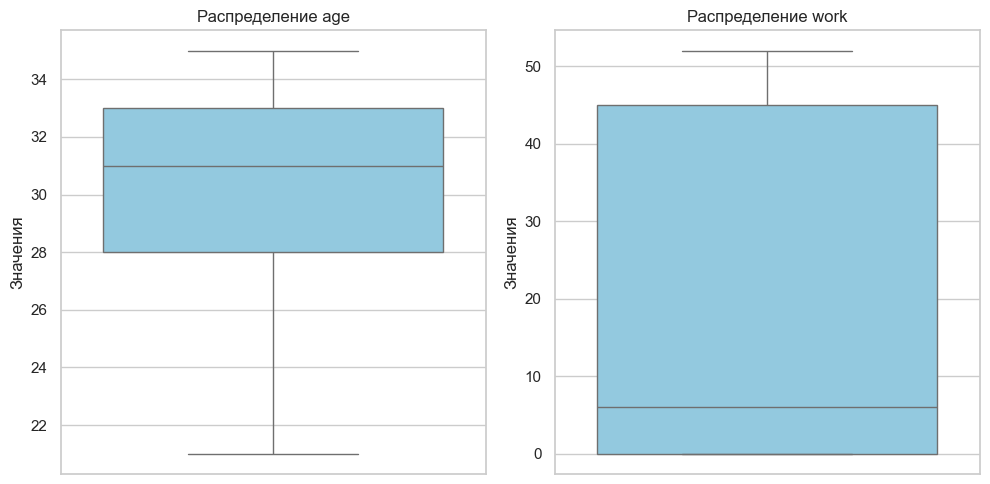

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графиков
sns.set(style="whitegrid")

# Boxplot для числовых переменных
num_cols = ['age', 'work']
plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Распределение {col}')
    plt.ylabel('Значения')

plt.tight_layout()
plt.show()

Выборсы по возрасту и продолжительности работы не наблюдаются.

In [28]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'\nВыбросы в {col}:')
    print(f'- Границы: [{lower_bound:.2f}, {upper_bound:.2f}]')
    print(f'- Количество выбросов: {len(outliers)}')
    print(f'- Примеры:\n{outliers[col].head()}')


Выбросы в age:
- Границы: [20.50, 40.50]
- Количество выбросов: 0
- Примеры:
Series([], Name: age, dtype: int64)

Выбросы в work:
- Границы: [-67.50, 112.50]
- Количество выбросов: 0
- Примеры:
Series([], Name: work, dtype: int64)


In [29]:
cat_cols = ['gender1', 'gender2', 'afam', 'hispanic', 'other', 'morekids']
for col in cat_cols:
    print(f'\nУникальные значения в {col}:')
    print(df[col].value_counts())


Уникальные значения в gender1:
gender1
male      15451
female    14549
Name: count, dtype: int64

Уникальные значения в gender2:
gender2
male      15182
female    14818
Name: count, dtype: int64

Уникальные значения в afam:
afam
no     28402
yes     1598
Name: count, dtype: int64

Уникальные значения в hispanic:
hispanic
no     27768
yes     2232
Name: count, dtype: int64

Уникальные значения в other:
other
no     28295
yes     1705
Name: count, dtype: int64

Уникальные значения в morekids:
morekids
no     18672
yes    11328
Name: count, dtype: int64


Аномалий по категориальным переменным нет.

## Производственный пайплайн

In [30]:
# Импортируем вспомогательные инструменты для пайплайна
import json
import random
from pathlib import Path
from typing import Dict, Tuple

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

sns.set_theme(style="whitegrid", palette="deep")
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

ITEM = "Fertility2"
PACKAGE = "AER"
raw_df = sm.datasets.get_rdataset(ITEM, PACKAGE, cache=True).data.copy()

In [31]:
def load_data(item: str = ITEM, package: str = PACKAGE) -> pd.DataFrame:
    """Загружает оригинальные данные."""
    return sm.datasets.get_rdataset(item, package, cache=True).data.copy()

def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    """Приводит названия к нижнему регистру, целевую переменную — к бинарному виду."""
    df_clean = df.copy()
    df_clean.columns = df_clean.columns.str.lower()
    if df_clean["morekids"].dtype == object:
        df_clean["morekids"] = df_clean["morekids"].map({"no": 0, "yes": 1})
    df_clean["morekids"] = df_clean["morekids"].astype("int64")
    categorical_cols = df_clean.select_dtypes(include="object").columns
    for col in categorical_cols:
        df_clean[col] = df_clean[col].astype("category")
    return df_clean

def engineer_features(df: pd.DataFrame, target: str = "morekids") -> Tuple[pd.DataFrame, pd.Series]:
    """Разделяет признаки и цель, выполняет one-hot кодирование."""
    df_model = df.copy()
    y = df_model[target]
    X = df_model.drop(columns=[target])
    X_encoded = pd.get_dummies(X, drop_first=True)
    return X_encoded, y

def split_data(
    X: pd.DataFrame,
    y: pd.Series,
    test_size: float = 0.2,
    random_state: int = SEED,
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    """Делит данные на train/test с учётом стратификации."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def build_model() -> Pipeline:
    """Создаёт конвейер стандартизации и логистической регрессии."""
    return Pipeline([
        ("scaler", StandardScaler(with_mean=False)),
        ("clf", LogisticRegression(max_iter=1000, random_state=SEED)),
    ])

def fit_model(model: Pipeline, X_train: pd.DataFrame, y_train: pd.Series) -> Pipeline:
    """Обучает модель."""
    model.fit(X_train, y_train)
    return model

def evaluate_model(model: Pipeline, X_test: pd.DataFrame, y_test: pd.Series) -> Dict[str, float]:
    """Возвращает метрики качества."""
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    metrics = {
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds, zero_division=0),
        "recall": recall_score(y_test, preds, zero_division=0),
        "f1": f1_score(y_test, preds, zero_division=0),
    }
    try:
        metrics["roc_auc"] = roc_auc_score(y_test, probs)
    except ValueError:
        metrics["roc_auc"] = float("nan")
    return metrics

def score_new(model: Pipeline, X_new: pd.DataFrame) -> np.ndarray:
    """Возвращает вероятности класса "1" для новых объектов."""
    return model.predict_proba(X_new)[:, 1]

### Автотесты

In [38]:
def test_load_data():
    df = load_data()
    assert not df.empty, "Датасет должен загружаться"
    assert {"morekids", "age", "work"}.issubset(df.columns), "Нет ожидаемых столбцов"

def test_clean_data():
    df = clean_data(load_data())
    assert set(df["morekids"].unique()) <= {0, 1}, "Цель должна быть бинарной"
    cat_cols = df.select_dtypes(include="category").columns
    assert len(cat_cols) > 0, "Категориальные признаки должны иметь тип category"

def test_engineer_features():
    df = clean_data(load_data())
    X, y = engineer_features(df)
    assert len(X) == len(y), "Размерности X и y не совпадают"
    assert X.select_dtypes(include="object").empty, "После кодирования не должно остаться object-колонок"

def test_model_pipeline():
    df = clean_data(load_data())
    X, y = engineer_features(df)
    X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.3)
    model = fit_model(build_model(), X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    for name, value in metrics.items():
        assert 0 <= value <= 1 or np.isnan(value), f"Метрика {name} вне диапазона"
    scores = score_new(model, X_test.head(2))
    assert scores.shape[0] == 2, "Скоринг должен возвращать значение для каждого объекта"

def run_all_tests():
    test_load_data()
    test_clean_data()
    test_engineer_features()
    test_model_pipeline()
    print("Все тесты успешно пройдены!")

In [39]:
# Запуск автотестов
run_all_tests()

Все тесты успешно пройдены!


### Инференс: обучение и оценка

In [34]:
clean_df = clean_data(raw_df)
X, y = engineer_features(clean_df)
X_train, X_test, y_train, y_test = split_data(X, y)
model = fit_model(build_model(), X_train, y_train)
metrics = evaluate_model(model, X_test, y_test)
metrics

{'accuracy': 0.6271666666666667,
 'precision': 0.5221374045801527,
 'recall': 0.15092674315975288,
 'f1': 0.23416638137624102,
 'roc_auc': 0.6159748495611284}

In [35]:
# Пример скоринга
score_new(model, X_test.head())

array([0.35201337, 0.31163997, 0.43265552, 0.35975053, 0.52816239])